In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Testando o git

Vimos nos últimos meses constantes notícias sobre os incêndios na Amazônia e como tais ocorrências estão cada vez mais comuns. Partindo desse pressuposto, decidiou-se investigar o número de queimadas nas florestas brasileiras ao longo do tempo.

Nossa base contém mais de 6000 registros de queimadas desde o ano de 1998 até 2017 em 23 estados brasileiros.

In [39]:
amazon = pd.read_csv('amazon.csv', encoding='latin-1')

amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [40]:
amazon.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [41]:
len(amazon)

6454

In [42]:
amazon = amazon.rename(columns={'number' : 'number_fires'})

In [43]:
amazon.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Primeiramente, agrupamos os estados em suas respectivas regiões para que os gráficos fiquem legiveis e plotamos a média de registros por ano por região.

Observa-se então, algo curioso: Alguns picos de queimadas na região Sul. Faz-se necessário ressaltar que a Amazônia legal compreende apenas os estados do Acre, Amapá, Pará, Amazonas, Rondonia, Roraima, e parte de Mato Grosso, Tocantins, e Maranhão. Mas obviamente, a Amazônia não é a única floresta no território brasileiro.

Percebe-se que houve um aumento no número de queimadas principalmente na região centro-oeste onde está o estado do Mato Grosso

In [44]:
amazon['region'] =['Norte' if row.state in ('Acre', 'Amapa', 'Amazonas', 'Pará',
                                            'Rondonia', 'Roraima', 'Tocantins') else
                   'Nordeste' if row.state in ('Alagoas','Bahia', 'Ceara', 'Maranhao', 'Paraiba', 
                                               'Pernambuco', 'Piau', 'Sergipe') else
                   'Centro-Oeste' if row.state in ('Distrito Federal', 'Goias', 
                                                   'Mato Grosso') else
                   'Sudeste' if row.state in ('Rio', 'Sao Paulo', 'Minas Gerais', 
                                              'Espirito Santo') else
                   'Sul' if row.state == 'Santa Catarina' else 'error' for i, row in amazon.iterrows()]

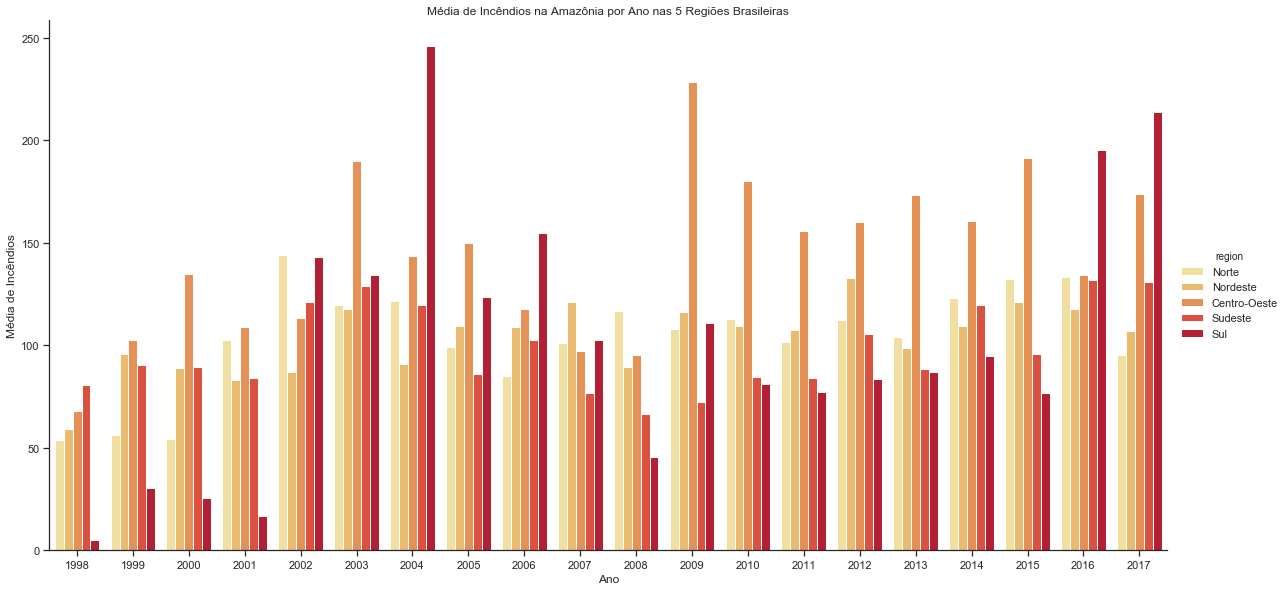

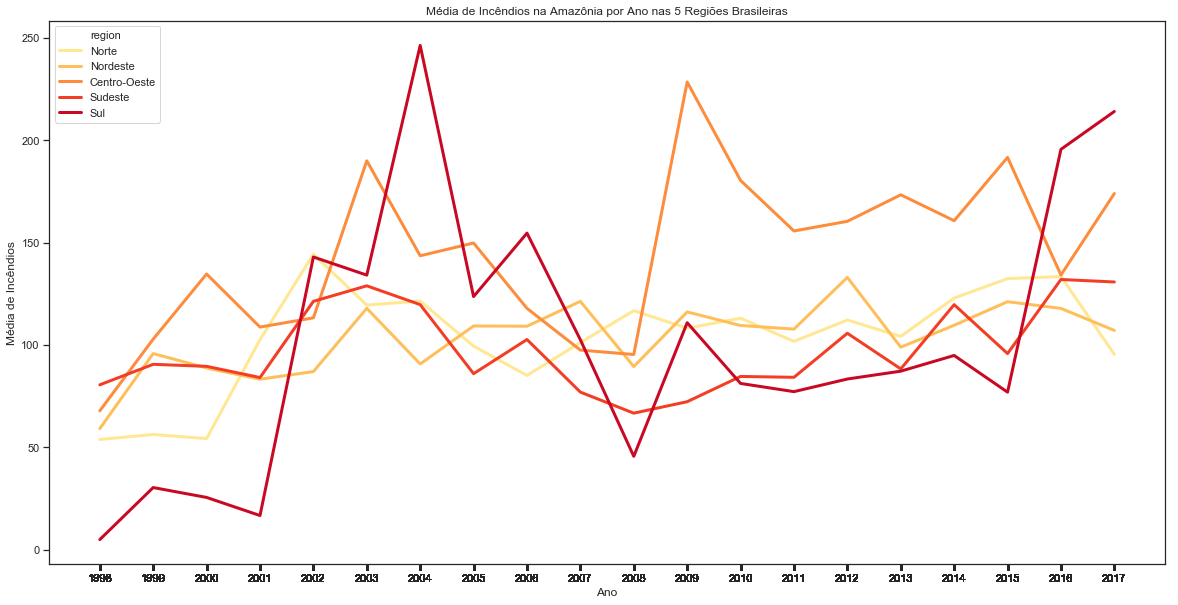

In [45]:
sns.set_style('ticks')
sns.catplot(x='year', y='number_fires', 
            hue='region', 
            palette = "YlOrRd",
            ci = None,
            data=amazon, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Ano')
plt.ylabel('Média de Incêndios')
plt.title('Média de Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras')
#sns.despine()
print('')
sns.set(style='ticks', rc={"lines.linewidth": 3.0})
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='number_fires', 
            hue='region', 
            palette = "YlOrRd",
            ci = None,
            data=amazon)
plt.xticks(amazon['year'])
plt.xlabel('Ano')
plt.ylabel('Média de Incêndios')
plt.title('Média de Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras')
#sns.despine()
plt.show()

Buscou-se ver quais eram os estados 'campeões' em queimadas para traçar um top 10. Mato Grosso liderou desparado com quase 100.000 ocorrências

In [46]:
amazon_group_state = amazon.groupby(['state'])['number_fires'].sum().to_frame()

amazon_group_state = amazon_group_state.reset_index()

amazon_group_10top = amazon_group_state.nlargest(10, 'number_fires')

In [47]:
amazon_group_10top.head()

,state,number_fires
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


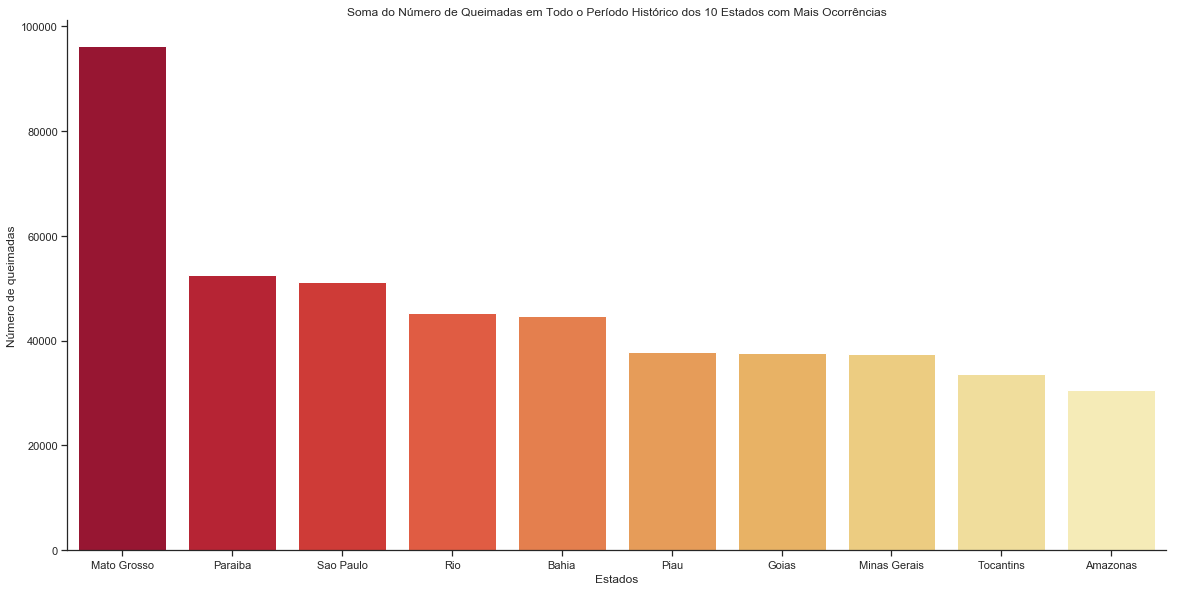

In [68]:
sns.set_style('ticks')
sns.catplot(x='state', y='number_fires', 
            #hue='state', 
            palette = "YlOrRd_r",
            ci = None,
            data=amazon_group_10top, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Estados')
plt.ylabel('Número de queimadas')
plt.title('Soma do Número de Queimadas em Todo o Período Histórico dos 10 Estados com Mais Ocorrências')
#sns.despine()
plt.show()

Fez-se então, uma comparação entre as décadas: de 1998 à 2007 e de 2008 à 2017 e notou-se de fato um aumento entre os períodos. O pico da primeira década deu-se em torno de 12.000 e na segunda, por volta de 14.000 onde em ambas notou-se uma predominância de ocorrências nas regiões norte e nordeste.

Ao olharmos agora para o gráfico de linha traçando a soma e não mais a média, precebemos que o número de incêndios da região sul é baixo se comparado as outras regiões.

In [51]:
amazon_group_year = amazon.groupby(['year','region'])['number_fires'].sum().to_frame()

amazon_group_year = amazon_group_year.reset_index()

amazon_group_year_98_07 = amazon_group_year.loc[amazon_group_year['year'] <= 2007]
#amazon_group_year_98_07 = amazon_group_year_98_07.nlargest(10, 'number_fires')

amazon_group_year_08_17 = amazon_group_year.loc[amazon_group_year['year'] > 2007]
#amazon_group_year_08_17 = amazon_group_year_08_17.nlargest(10, 'number_fires')

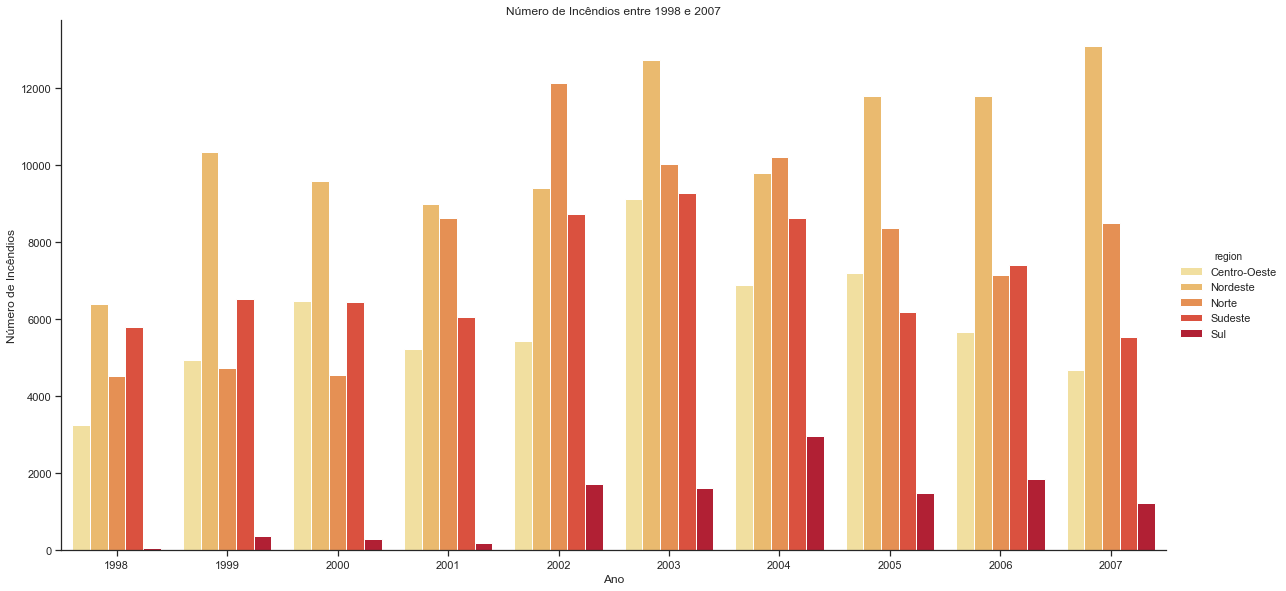

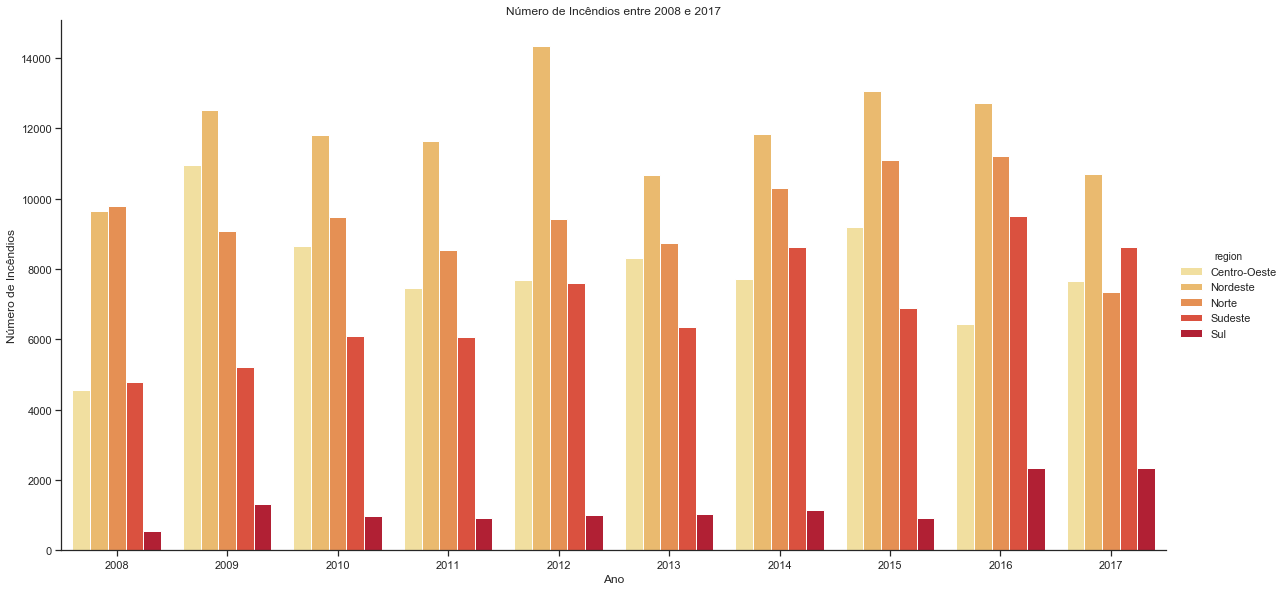

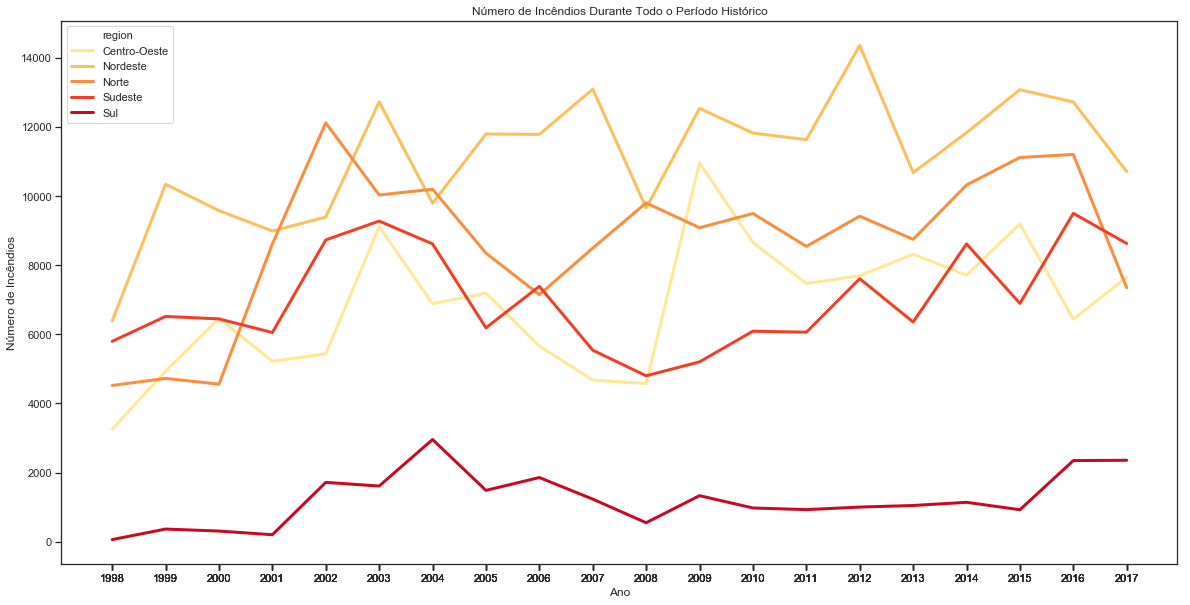

In [73]:
sns.set_style('ticks')
sns.catplot(x='year', y='number_fires', 
            hue='region', 
            palette = "YlOrRd",
            ci = None,
            data=amazon_group_year_98_07, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios entre 1998 e 2007')
#sns.despine()
print('')
sns.set_style('ticks')
sns.catplot(x='year', y='number_fires', 
            hue='region', 
            palette = "YlOrRd",
            ci = None,
            data=amazon_group_year_08_17, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios entre 2008 e 2017')
#sns.despine()
print('')
sns.set(style='ticks', rc={"lines.linewidth": 3.0})
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='number_fires', 
            hue='region', 
            palette = "YlOrRd",
            ci = None,
            data=amazon_group_year)
plt.xticks(amazon_group_year['year'])
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios Durante Todo o Período Histórico')
#sns.despine()
plt.show()

Percebe-se também que o maior número de ococrrências no período histórico se da em Julho e ao traçarmos a linha de ocorrências, é visto que apesar do pico ter sido em 2003, desde 2008 há uma tendência de crescimento no número de queimadas.

In [54]:
amazon_group_month = amazon.groupby(['month'])['number_fires'].sum().to_frame()

amazon_group_month = amazon_group_month.reset_index()

Text(0.5,1,'Número de Incêndios Durante Todo o Período Histórico por Mês')

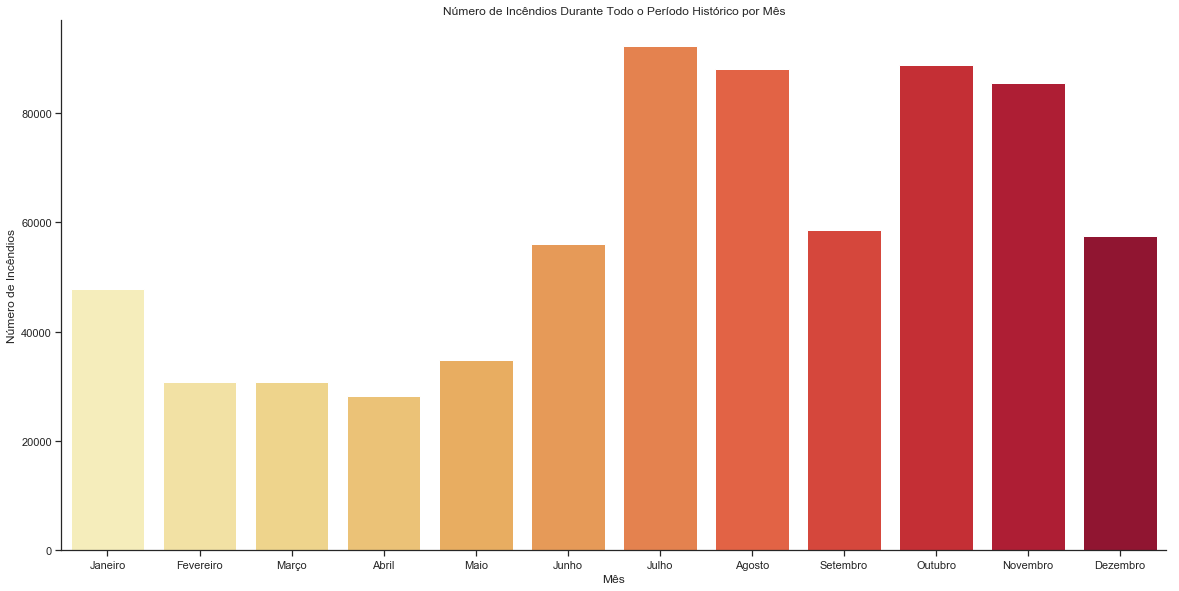

In [74]:
print('')
sns.set_style('ticks')
sns.catplot(x='month', y='number_fires',  
            palette = "YlOrRd",
            order=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto',
                   'Setembro','Outubro','Novembro','Dezembro'],
            ci = None,
            data=amazon_group_month, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios Durante Todo o Período Histórico por Mês')
#sns.despine()

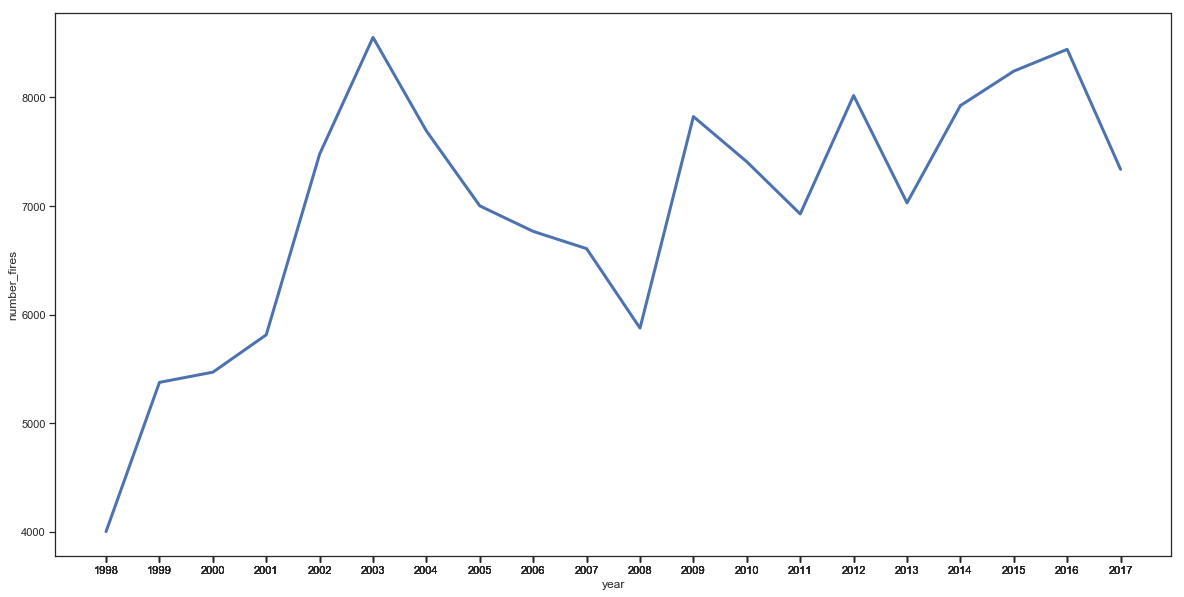

In [56]:
sns.set(style='ticks', rc={"lines.linewidth": 3.0})
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='number_fires', 
            #hue='region', 
            #palette = "viridis",
            ci = None,
            data=amazon_group_year)
# plt.xlabel('Tipo Seller')
# plt.ylabel('Ticket Médio Médio')
# plt.title('Ticket Médio Médio Agrupados por Faixa de GMV')
plt.xticks(amazon_group_year['year'])
#sns.despine()
plt.show()

In [60]:
amazon_forest = amazon.groupby(['state'])['number_fires'].sum().to_frame()

amazon_forest = amazon_forest.reset_index()

amazon_forest = amazon_forest.loc[amazon_forest['state'].isin 
                                                      (['Mato Grosso', 
                                                       'Acre', 
                                                       'Amapá', 
                                                       'Pará', 
                                                       'Amazonas',
                                                       'Rondonia',
                                                       'Rondonia',
                                                       'Tocantins',
                                                       'Maranhão'])]

Por fim, analisando apenas os estados que fazem parte da Amazônia legal, Mato Grosso contínua sendo o estado de maior número de ocorrências e percebe-se uma tendência de subida e descida ao longo do tempo, onde desde 2015 até 2017 estava no ciclo de queda.

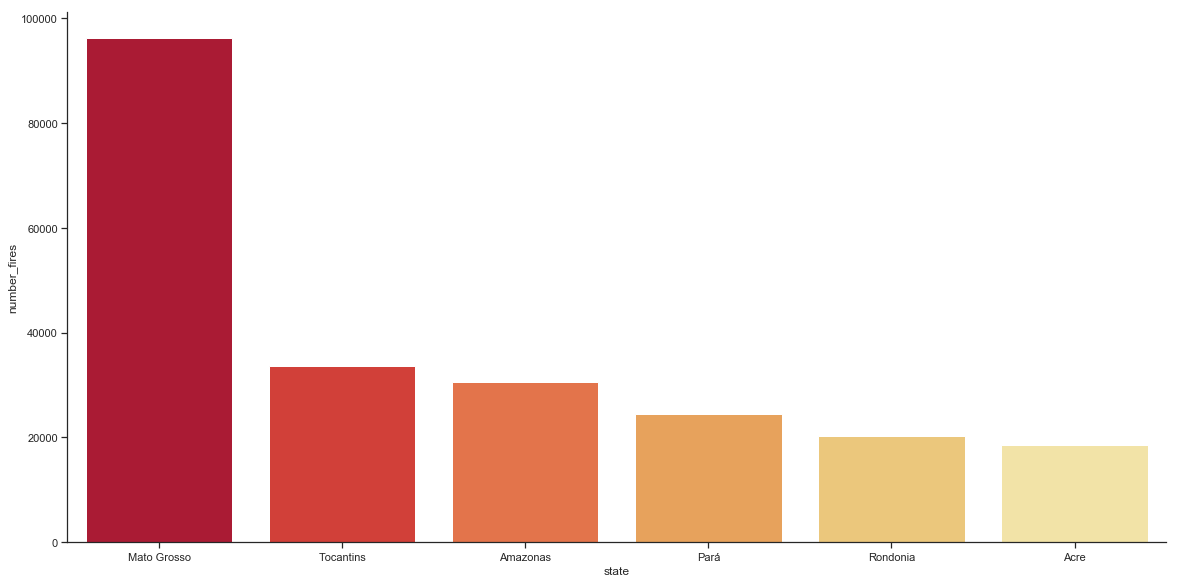

In [63]:
sns.set_style('ticks')
sns.catplot(x='state', y='number_fires', 
            #hue='state', 
            palette = "YlOrRd_r",
            ci = None,
            data=amazon_forest, 
            height=8.27, 
            aspect=20/10,
            order=['Mato Grosso','Tocantins','Amazonas','Pará','Rondonia','Acre'],
            kind='bar')
plt.xlabel('Estado')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios nos Estadis da Amazônia Legal')
#sns.despine()
plt.show()

In [66]:
amazon_forest_year = amazon.groupby(['year','state'])['number_fires'].sum().to_frame()

amazon_forest_year = amazon_forest_year.reset_index()

amazon_forest_year = amazon_forest_year.loc[amazon_forest_year['state'].isin 
                                                      (['Mato Grosso', 
                                                       'Acre', 
                                                       'Amapá', 
                                                       'Pará', 
                                                       'Amazonas',
                                                       'Rondonia',
                                                       'Rondonia',
                                                       'Tocantins',
                                                       'Maranhão'])]

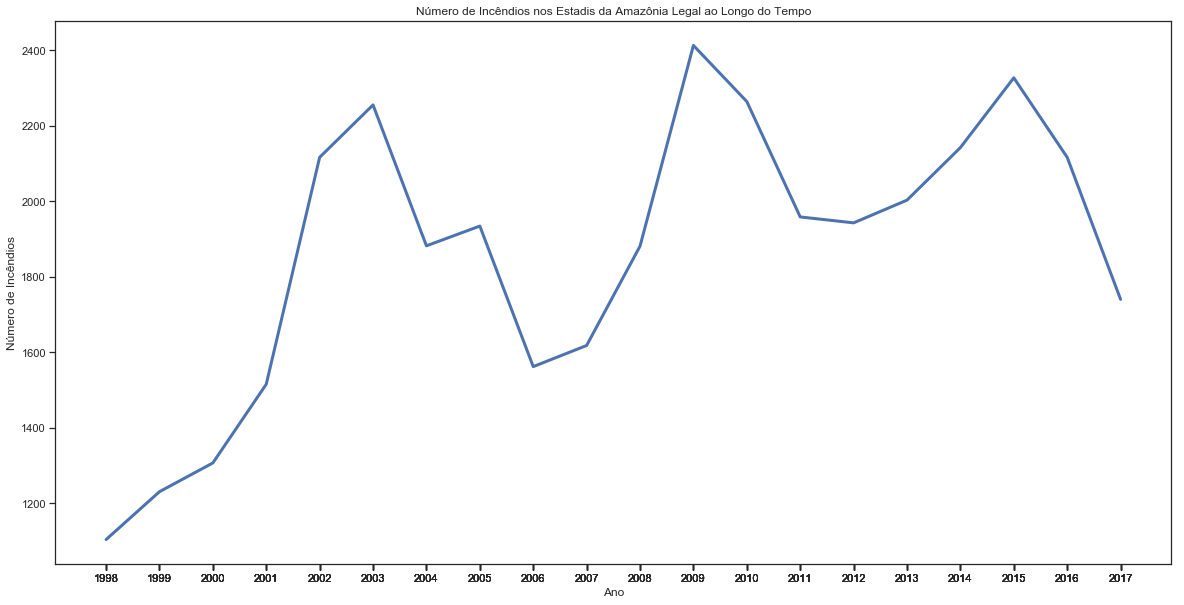

In [75]:
sns.set(style='ticks', rc={"lines.linewidth": 3.0})
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='number_fires', 
            #hue='region', 
            #palette = "viridis",
            ci = None,
            data=amazon_forest_year)
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios nos Estadis da Amazônia Legal ao Longo do Tempo')
plt.xticks(amazon_forest_year['year'])
#sns.despine()
plt.show()